<a href="https://colab.research.google.com/github/ianuragbhatt/time-series-tutorials/blob/main/01_tsf_model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Test Split

In [ ]:
# calculate a train-test split of a time series dataset
from pandas import read_csv
series = read_csv(
    'sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' %   (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 3265
Training Observations: 2154
Testing Observations: 1111


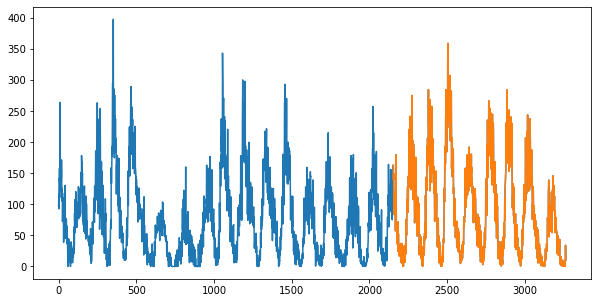

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(10,5))
pyplot.plot(X)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

## Multiple Train-Test Splits

Observations: 1633
Training Observations: 817
Testing Observations: 816
Observations: 2449
Training Observations: 1633
Testing Observations: 816
Observations: 3265
Training Observations: 2449
Testing Observations: 816


<Figure size 432x288 with 0 Axes>

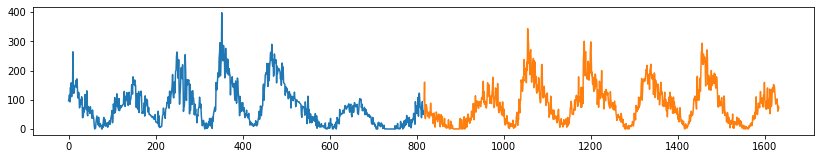

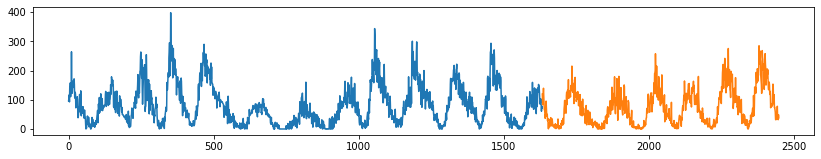

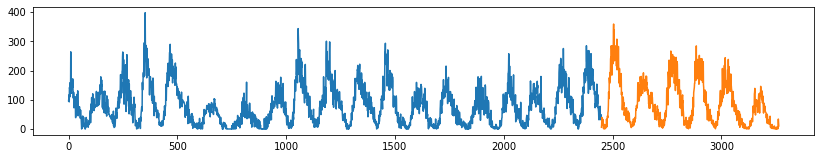

In [ ]:
# calculate repeated train-test splits of time series data
from pandas import read_csv
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
series = read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    pyplot.figure(figsize=(14,8))
    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    index += 1
pyplot.show()

* Using multiple train-test splits will result in more models being trained, and in turn, a more accurate estimate of the performance of the models on unseen data. A limitation of the train-test split approach is that the trained models remain fixed as they are evaluated on each evaluation in the test set. This may not be realistic as models can be retrained as new daily or monthly observations are made available.

## Walk Forward Validation

In [ ]:
# walk forward evaluation model for time series data
from pandas import read_csv
series = read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
    train, test = X[0:i], X[i:i+1]
    print('train=%d, test=%d' % (len(train), len(test)))

* Walk-forward validation is the gold standard of model evaluation. It is the k-fold cross-validation of the time series world and is recommended for your own projects.

# Forecasting Performance Measures

## Forecast Error (or Residual Forecast Error)
* The forecast error is calculated as the expected value minus the predicted value. This is called the residual error of the prediction.
```
forecast_error = expected_value - predicted_value
```

In [ ]:
# calculate forecast error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]


## Mean Forecast Error (or Forecast Bias)
* Mean forecast error as calculated as the average of forecast error values
```
mean_forecast_error = mean(forecast_error)
```

* Forecast errors can be positive and negative. This means that when the average of these values is calculated, an `ideal mean forecast error would be zero`. A mean forecast error value other than zero suggests a `tendency of the model to over forecast (negative error) or under forecast (positive error)`. As such, the mean forecast error is also called the forecast bias. The forecast error can be calculated directly as the mean of the forecast values. The example below demonstrates how the mean of the forecast errors can be calculated manually.


In [ ]:
# calculate mean forecast error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
bias = sum(forecast_errors) * 1.0/len(expected)
print('Forecast Bias: %f' % bias)

Forecast Bias: -0.100000


* The units of the forecast bias are the same as the units of the predictions. A forecast bias of zero, or a very small number near zero, shows an unbiased model.

## Mean Absolute Error
* The mean absolute error, or MAE, is calculated as the average of the forecast error values, where all of the forecast values are forced to be positive. Forcing values to be positive is called making them absolute. This is signified by the absolute function abs() or shown mathematically as two pipe characters around the value: |value|.
```
mean_absolute_error = mean(abs(forecast_error))
```

In [ ]:
# calculate mean absolute error
from sklearn.metrics import mean_absolute_error 
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 0.140000


* 
These error values are in the original units of the predicted values. A mean absolute error of zero indicates no error.


## Mean Squared Error
* These error values are in the original units of the predicted values. A mean absolute error of zero indicates no error.
```
mean_squared_error = mean(forecaste_error^2)
```

In [ ]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)

MSE: 0.022000


* 
The error values are in squared units of the predicted values. A mean squared error of zero indicates perfect skill, or no error.

## Root Mean Square Error
* The mean squared error described above is in the squared units of the predictions. It can be transformed back into the original units of the predictions by taking the square root of the mean squared error score. This is called the root mean squared error, or RMS

In [ ]:
# calculate root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.148324


* The RMES error values are in the same units as the predictions. As with the mean squared error, an RMSE of zero indicates no error.

# Persistence Model For Forecasting
* Establishing a baseline is essential on any time series forecasting problem. A baseline in performance gives you an idea of how well all other models will actually perform on your problem. In this tutorial, you will discover how to develop a persistence forecast that you can use to calculate a baseline level of performance on a time series dataset with Python.

## Forecast Performance Baseline
* The goal is to get a baseline performance on your time series forecast problem as quickly as possible so that you can get to work better understanding the dataset and developing more advanced models. Three properties of a good technique for making a baseline forecast are:
    * Simple: A method that requires little or no training or intelligence.
    * Fast: A method that is fast to implement and computationally trivial to make a prediction
    * Repeatable: A method that is deterministic, meaning that it produces an expected output given the same input.
* A common algorithm used in establishing a baseline performance is the persistence algorithm.


## Persistence Algorithim
* The most common baseline method for supervised machine learning is the Zero Rule algorithm. This algorithm predicts the majority class in the case of classification, or the average outcome in the case of regression. This could be used for time series, but does not respect the serial correlation structure in time series datasets. The equivalent technique for use with time series dataset is the persistence algorithm.

## Persistence Algorithim Steps
1. Transform the univariate dataset into a supervised learning problem.
2. Establish the train and test datasets for the test harness.
3. Define the persistence model.
4. Make a forecast and establish a baseline performance.
5. Review the complete example and plot the output.

### Step 1: Define the Supervised Learning Problem
* 
The first step is to load the dataset and create a lagged representation. That is, given the observation at t, predict the observation at t+1.

In [ ]:
# Create lagged dataset
import pandas as pd
series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

       t    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


### Step 2: Train and Test Sets
* The next step is to separate the dataset into train and test sets. We will keep the first 66% of the observations for training and the remaining 34% for evaluation. During the split, we are careful to exclude the first row of data with the NaN value

In [ ]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

### Step 3: Persistence Algorithim
* We can define our persistence model as a function that returns the value provided as input. For example, if the t value of 266.0 was provided, then this is returned as the prediction, whereas the actual real or expected value happens to be 145.9

In [ ]:
def model_persistence(x):
  return x

### Step 4: Make and Evaluate Forecast
* 
Now we can evaluate this model on the test dataset. We do this using the walk-forward validation method. No model training or retraining is required, so in essence, we step through the test dataset time step by time step and get predictions. Once predictions are made for each time step in the test dataset, they are compared to the expected values and a Root Mean Squared Error (RMSE) score is calculated.

In [ ]:
# walk-forward validation
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 133.156


* In this case, the RMSE is more than 133 shampoo sales per month over the test dataset

### Step 5: Complete Example
* Finally, a plot is made to show the training dataset and the diverging predictions from the expected values from the test dataset. From the plot of the persistence model predictions, it is clear that the model is one-step behind reality. There is a rising trend and month-to-month noise in the sales figures, which highlights the limitations of the persistence technique.

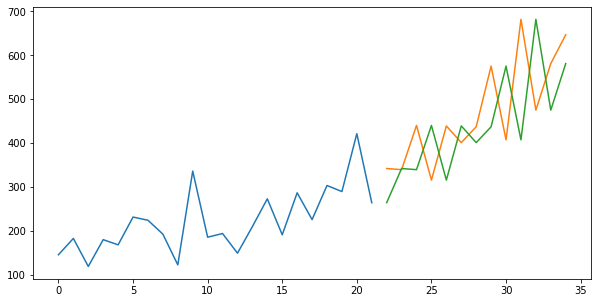

In [ ]:
# plot predictions and expected results
from matplotlib import pyplot
pyplot.figure(figsize=(10,5))
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

* The persistence algorithm is naive. It is often called the naive forecast. It assumes nothing about the specifics of the time series problem to which it is applied. This is what makes it so easy to understand and so quick to implement and evaluate.

# Visualize Residual Forecast Errors
* Forecast errors on time series regression problems are called residuals or residual errors. Careful exploration of residual errors on your time series prediction problem can tell you a lot about your forecast model and even suggest improvements.
* We can collect individual residual errors across all forecasts and use them to better understand the forecast model. Generally, when exploring residual errors we are looking for patterns or structure. A sign of a pattern suggests that the errors are not random.
* We expect the residual errors to be random, because it means that the model has captured all of the structure and the only error left is the random fluctuations in the time series that cannot be modeled. A sign of a pattern or structure suggests that there is more information that a model could capture and use to make better predictions.


In [ ]:
# calculate residuals from a persistence forecast
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
    squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
residuals.head()

,0
0,9.0
1,-10.0
2,3.0
3,-6.0
4,30.0


* Example output of the first five forecast errors for the persistence forecast on the Daily Female Births dataset.

## Residual Line Plot

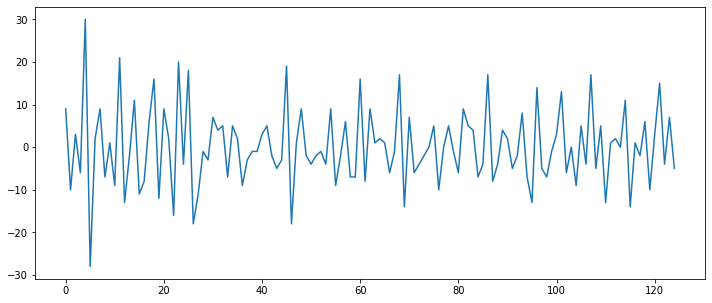

In [ ]:
# plot residuals
from matplotlib import pyplot

pyplot.figure(figsize=(12,5))
pyplot.plot(residuals)
pyplot.show()

* 
Running the example shows a seemingly random plot of the residual time series. If we did see trend, seasonal or cyclic structure, we could go back to our model and attempt to capture those elements directly

## Residual Summary Statistics
* 
We can calculate summary statistics on the residual errors. Primarily, we are interested in the mean value of the residual errors. A value close to zero suggests no bias in the forecasts, whereas positive and negative values suggest a positive or negative bias in the forecasts made. It is useful to know about a bias in the forecasts as it can be directly corrected in forecasts prior to their use or evaluation.

In [ ]:
residuals.describe()

,0
count,125.000000
mean,0.064000
std,9.187776
min,-28.000000
25%,-6.000000
50%,-1.000000
75%,5.000000
max,30.000000


* Running the example shows a mean error value close to zero, but perhaps not close enough. It suggests that there may be some bias and that we may be able to further improve the model by performing a bias correction. This could be done by adding the mean residual error (0.064000) to forecasts. This may work in this case, but it is a naive form of bias correction and there are more sophisticated methods available.

## Residual Histogram and Density Plot
* Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean. Plots can help discover skews in this distribution.

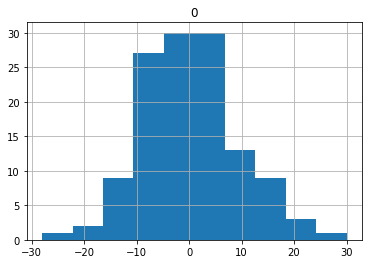

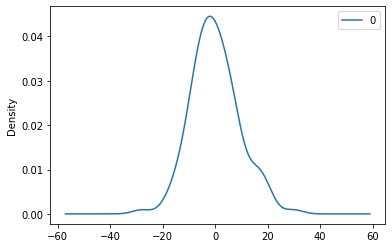

In [ ]:
# histogram plot
residuals.hist()
pyplot.show()
# density plot
residuals.plot(kind='kde')
pyplot.show()

* We can see that the distribution does have a Gaussian look, but is perhaps more pointy, showing an exponential distribution with some asymmetry. If the plot showed a distribution that was distinctly non-Gaussian, it would suggest that assumptions made by the modeling process were perhaps incorrect and that a different modeling method may be required. A large skew may suggest the opportunity for performing a transform to the data prior to modeling, such as taking the log or square root.

## Residual Q-Q Plot
* A Q-Q plot, or quantile plot, compares two distributions and can be used to see how similar or different they happen to be. We can create a Q-Q plot using the qqplot() function1 in the Statsmodels library.
* The Q-Q plot can be used to quickly check the normality of the distribution of residual errors. The values are ordered and compared to an idealized Gaussian distribution. The comparison is shown as a scatter plot (theoretical on the x-axis and observed on the y-axis) where a match between the two distributions is shown as a diagonal line from the bottom left to the top-right of the plot.

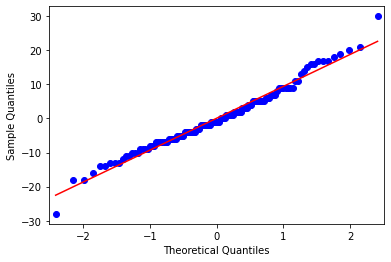

In [ ]:
import numpy
from statsmodels.graphics.gofplots import qqplot

residuals = numpy.array(list(residuals[0].values))
qqplot(residuals, line='r')
pyplot.show()

* Running the example shows a Q-Q plot that the distribution is seemingly normal with a few bumps and outliers.

## Residual Autocorrelation Plot
* We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).

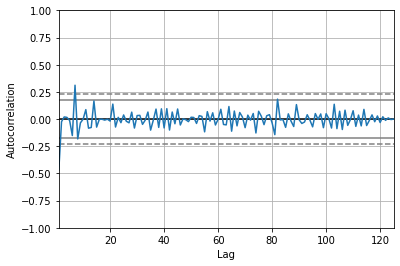

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(residuals)
pyplot.show()

# Reframe Time Series Forecasting Problem
* You do not have to model your time series forecast problem as-is. There are many ways to reframe your forecast problem that can both simplify the prediction problem and potentially expose more or different information to be modeled. A reframing can ultimately result in better and/or more robust forecasts.

## Benifits of Reframing your Problem
* Reframing your problem is the idea of exploring alternate perspectives on what is to be predicted. There are two potential benefits to exploring alternate framings of your time series forecast problem:
    1. Simplify your problem.
    2. Provide the basis for an ensemble forecast.


### Simplify your Problem
* Perhaps the largest wins on a forecasting project can come from a reframing of the problem. This is because the structure and type of prediction problem has so much more impact than the choice of data transforms, choice of model, or the choice of model hyperparameters. It is the biggest lever in a project and must be carefully considered.


### Ensemble Forecast
* In addition to changing the problem you are working on, reframing plays another role: it can provide you with a suite of different, but highly related problems that you can model. The benefit of this is that the framings may be different enough to require differences in data preparation and modeling methods.
* Models of differing perspectives on the same problem may capture different information from the input and in turn result in predictions that are skillful, but in different ways. These predictions may be combined in an ensemble to result in a more skillful or more robust forecast.

## Naive Time Series Forecast
* 
The naive approach is to predict the problem as-is. For reference, we will call this the naive time series forecast. In this case, the seasonal information can be removed to make the series seasonal stationary. The time series can then be modeled based on some function of the lagged observations.

## Regression Framings

In [ ]:
# reframe precision of regression forecast
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# load data
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# round forecast to nearest 5
for i in range(len(dataframe['t+1'])):
    dataframe['t+1'][i] = int(dataframe['t+1'][i] / 5) * 5.0
print(dataframe.head(5))

      t   t+1
0   NaN  20.0
1  20.7  15.0
2  17.9  15.0
3  18.8  10.0
4  14.6  15.0


## Classification Framings

In [ ]:
# reframe regression as classification
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# load data
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# make discrete
for i in range(len(dataframe['t+1'])):
    value = dataframe['t+1'][i]
    if value < 10.0:
        dataframe['t+1'][i] = 0
    elif value >= 25.0:
        dataframe['t+1'][i] = 2
    else:
        dataframe['t+1'][i] = 1
print(dataframe.head(5))

      t  t+1
0   NaN  1.0
1  20.7  1.0
2  17.9  1.0
3  18.8  1.0
4  14.6  1.0


## Time Horizons Framings

In [ ]:
# reframe time horizon of forecast
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# load data
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values, values.shift(-1), values.shift(-2), values.shift(-3), values.shift(-4), values.shift(-5),
values.shift(-6)], axis=1)
dataframe.columns = ['t', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7']
print(dataframe.head(14))

       t   t+1   t+2   t+3   t+4   t+5   t+6   t+7
0    NaN  20.7  17.9  18.8  14.6  15.8  15.8  15.8
1   20.7  17.9  18.8  14.6  15.8  15.8  15.8  17.4
2   17.9  18.8  14.6  15.8  15.8  15.8  17.4  21.8
3   18.8  14.6  15.8  15.8  15.8  17.4  21.8  20.0
4   14.6  15.8  15.8  15.8  17.4  21.8  20.0  16.2
5   15.8  15.8  15.8  17.4  21.8  20.0  16.2  13.3
6   15.8  15.8  17.4  21.8  20.0  16.2  13.3  16.7
7   15.8  17.4  21.8  20.0  16.2  13.3  16.7  21.5
8   17.4  21.8  20.0  16.2  13.3  16.7  21.5  25.0
9   21.8  20.0  16.2  13.3  16.7  21.5  25.0  20.7
10  20.0  16.2  13.3  16.7  21.5  25.0  20.7  20.6
11  16.2  13.3  16.7  21.5  25.0  20.7  20.6  24.8
12  13.3  16.7  21.5  25.0  20.7  20.6  24.8  17.7
13  16.7  21.5  25.0  20.7  20.6  24.8  17.7  15.5
